# Cluster Validation

Validation (or 'Evaluation') of clustering results is as difficult as the clustering itself. Popular approaches involve "internal" evaluation, where the clustering is summarized to a single quality score, "external" evaluation, where the clustering is compared to an existing "ground truth" classification, "manual" evaluation by a human expert, and "indirect" evaluation by evaluating the utility of the clustering in its intended application.

Internal evaluation measures suffer from the problem that they represent functions that themselves can be seen as a clustering objective. For example, one could cluster the data set by the Silhouette coefficient; except that there is no known efficient algorithm for this. By using such an internal measure for evaluation, one rather compares the similarity of the optimization problems, and not necessarily how useful the clustering is.

External evaluation has similar problems: if we have such "ground truth" labels, then we would not need to cluster; and in practical applications we usually do not have such labels. On the other hand, the labels only reflect one possible partitioning of the data set, which does not imply that there does not exist a different, and maybe even better, clustering.

Neither of these approaches can therefore ultimately judge the actual quality of a clustering, but this needs human evaluation, which is highly subjective. Nevertheless, such statistics can be quite informative in identifying bad clusterings, but one should not dismiss subjective human evaluation.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Evaluating clustering with ground truth

In [2]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

### Create a synthetic dataset

In [3]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

### Rescale the data to zero mean and unit variance

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

### Compare Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)

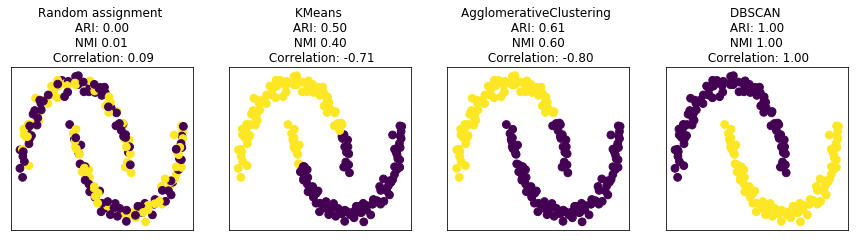

In [5]:
from scipy.stats import pearsonr, spearmanr
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,s=60)
axes[0].set_title("Random assignment \n ARI: {:.2f} \n NMI {:.2f} \n Correlation: {:.2f}".format(
adjusted_rand_score(y, random_clusters),
normalized_mutual_info_score(y, random_clusters),
np.round(pearsonr(y, random_clusters),2)[0]))
for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} \n ARI: {:.2f} \n NMI {:.2f} \n Correlation: {:.2f}".format(
        algorithm.__class__.__name__,
        adjusted_rand_score(y, clusters), 
        normalized_mutual_info_score(y, clusters),
        np.round(pearsonr(y, clusters),2)[0]
   ))

## Evaluating clustering without ground truth

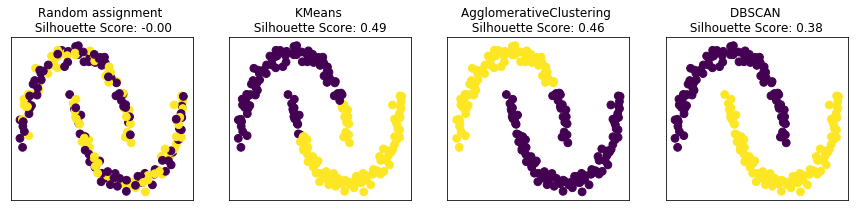

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,s=60)
axes[0].set_title("Random assignment \n Silhouette Score: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} \n Silhouette Score: {:.2f} ".format(
        algorithm.__class__.__name__,
        silhouette_score(X_scaled, clusters)))

### Visual Assessment of Cluster Tendency (VAT)

In [7]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

In [8]:
X_df = pd.DataFrame(X_scaled)
X_df['cluster'] = clusters
X_df= X_df.sort_values(by=['cluster'])

In [9]:
from sklearn.metrics import pairwise
d1 = pairwise.pairwise_distances(X_df.iloc[:,0:2])

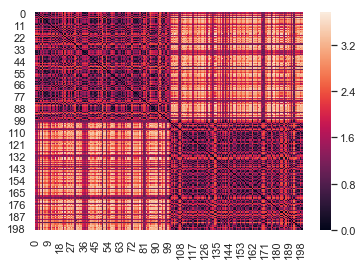

In [10]:
import seaborn as sns; sns.set()
sns.heatmap(d1)

#### VAT for Iris Data

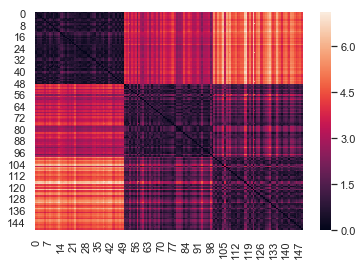

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
d2 = pairwise.pairwise_distances(iris.data)
sns.heatmap(d2)

#### VAT for Breast Cancer Data

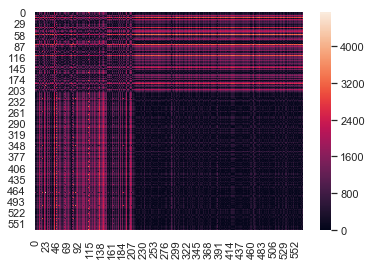

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data)
cancer_df['Target'] = cancer.target
cancer_df = cancer_df.sort_values(by='Target')
d3 = pairwise.pairwise_distances(cancer_df.iloc[:,0:29])
sns.heatmap(d3)

### Visualize reduced dimensions data

In [14]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [15]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['PC1','PC2']
X_pca['Target'] = cancer.target
X_pca = X_pca.sort_values(by='Target')

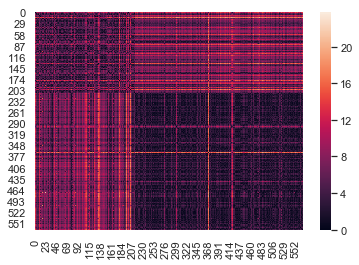

In [16]:
d4 = pairwise.pairwise_distances(X_pca)
sns.heatmap(d4)